In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import nltk

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv(r'Dataset\GBcomments.csv', on_bad_lines='skip')
df

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0
...,...,...,...,...
718447,lLN1FwiqGwc,MEME ME MEME ME MEME ME,0,0
718448,lLN1FwiqGwc,"Yeah, but does everybody float?",0,0
718449,lLN1FwiqGwc,That meme me dace 😂,0,0
718450,lLN1FwiqGwc,10:43 Is that Miles Upshur????,2,0


In [5]:
df.drop(["video_id", "likes", "replies"], axis=1, inplace=True)

In [6]:
df.isnull().sum()

comment_text    28
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

comment_text    0
dtype: int64

In [8]:
df.shape

(718424, 1)

In [9]:
df.nunique()

comment_text    372844
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718424 entries, 0 to 718451
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  718424 non-null  object
dtypes: object(1)
memory usage: 11.0+ MB


In [11]:
df.drop(41587, inplace=True)

In [12]:
df = df.reset_index().drop('index',axis=1)
df

,comment_text
0,It's more accurate to call it the M+ (1000) be...
1,To be there with a samsung phone\n😂😂😂
2,"Thank gosh, a place I can watch it without hav..."
3,What happened to the home button on the iPhone...
4,Power is the disease. Care is the cure. Keep...
...,...
718418,MEME ME MEME ME MEME ME
718419,"Yeah, but does everybody float?"
718420,That meme me dace 😂
718421,10:43 Is that Miles Upshur????


In [13]:
df['comment_text']

0         It's more accurate to call it the M+ (1000) be...
1                     To be there with a samsung phone\n😂😂😂
2         Thank gosh, a place I can watch it without hav...
3         What happened to the home button on the iPhone...
4         Power is the disease.  Care is the cure.  Keep...
                                ...                        
718418                              MEME ME MEME ME MEME ME
718419                      Yeah, but does everybody float?
718420                                  That meme me dace 😂
718421                       10:43 Is that Miles Upshur????
718422                                  WA-HA\nWA-HA\nWA-HA
Name: comment_text, Length: 718423, dtype: object

In [14]:
# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Preprocess the comment text
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0877\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def preprocess_text(comment):
    # Convert to lowercase
    comment = comment.lower().strip()
    # Remove URLs
    comment = re.sub(r'http\S+|www.\S+', '', comment)
    # Remove emojis
    comment = emoji.replace_emoji(comment, replace='')
    # Remove non-alphanumeric characters
    comment = re.sub(r'[^a-zA-Z0-9\s]', '', comment)
    # Remove stopwords
    comment = " ".join([word for word in comment.split() if word not in stop_words])
    return comment

In [16]:
# Apply preprocessing to the comments
df['comment_text'] = df['comment_text'].apply(preprocess_text)
df

,comment_text
0,accurate call 1000 price closer calling x 10
1,samsung phonen
2,thank gosh place watch without hd speed doesnt...
3,happened home button iphone x coughcopying sam...
4,power disease care cure keep caring others bes...
...,...
718418,meme meme meme
718419,yeah everybody float
718420,meme dace
718421,1043 miles upshur


In [17]:
# Tokenization (splitting the text into individual words (tokens))
tokenized_tweet = df['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [accurate, call, 1000, price, closer, calling,...
1                                    [samsung, phonen]
2    [thank, gosh, place, watch, without, hd, speed...
3    [happened, home, button, iphone, x, coughcopyi...
4    [power, disease, care, cure, keep, caring, oth...
Name: comment_text, dtype: object

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Lemmatization and Stopwords Removal
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\0877\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0877\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Lemmatize and remove stopwords
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(w) for w in x if w not in stop_words])
tokenized_tweet

0         [accurate, call, 1000, price, closer, calling,...
1                                         [samsung, phonen]
2         [thank, gosh, place, watch, without, hd, speed...
3         [happened, home, button, iphone, x, coughcopyi...
4         [power, disease, care, cure, keep, caring, oth...
                                ...                        
718418                                   [meme, meme, meme]
718419                             [yeah, everybody, float]
718420                                         [meme, dace]
718421                                 [1043, mile, upshur]
718422                                     [wahanwahanwaha]
Name: comment_text, Length: 718423, dtype: object

In [20]:
# converts each list of tokens (words) back into a single string in the tokenized_tweet object
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
tokenized_tweet

0              accurate call 1000 price closer calling x 10
1                                            samsung phonen
2         thank gosh place watch without hd speed doesnt...
3         happened home button iphone x coughcopying sam...
4         power disease care cure keep caring others bes...
                                ...                        
718418                                       meme meme meme
718419                                 yeah everybody float
718420                                            meme dace
718421                                     1043 mile upshur
718422                                       wahanwahanwaha
Name: comment_text, Length: 718423, dtype: object

In [21]:
# updates the comment_text column in the df DataFrame with the values from tokenized_tweet
df['comment_text'] = tokenized_tweet
df

,comment_text
0,accurate call 1000 price closer calling x 10
1,samsung phonen
2,thank gosh place watch without hd speed doesnt...
3,happened home button iphone x coughcopying sam...
4,power disease care cure keep caring others bes...
...,...
718418,meme meme meme
718419,yeah everybody float
718420,meme dace
718421,1043 mile upshur


In [22]:
import nltk
nltk.download('vader_lexicon') # contains a dictionary of words with their associated sentiment scores (positive, negative, or neutral)

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer() # designed for sentiment analysis, particularly effective on social media text

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\0877\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
# extracts the compound sentiment score (a single value between -1 and +1) and stores it in a new column called Sentiment Scores in the df DataFrame
df['Sentiment Scores'] = df['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])
df

,comment_text,Sentiment Scores
0,accurate call 1000 price closer calling x 10,0.0000
1,samsung phonen,0.0000
2,thank gosh place watch without hd speed doesnt...,0.0624
3,happened home button iphone x coughcopying sam...,0.0000
4,power disease care cure keep caring others bes...,0.8910
...,...,...
718418,meme meme meme,0.0000
718419,yeah everybody float,0.2960
718420,meme dace,0.0000
718421,1043 mile upshur,0.0000


In [24]:
# classifies the sentiment of each comment into Positive, Neutral, or Negative based on the compound score
df['Sentiment'] = df['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))
df

,comment_text,Sentiment Scores,Sentiment
0,accurate call 1000 price closer calling x 10,0.0000,Neutral
1,samsung phonen,0.0000,Neutral
2,thank gosh place watch without hd speed doesnt...,0.0624,Positive
3,happened home button iphone x coughcopying sam...,0.0000,Neutral
4,power disease care cure keep caring others bes...,0.8910,Positive
...,...,...,...
718418,meme meme meme,0.0000,Neutral
718419,yeah everybody float,0.2960,Positive
718420,meme dace,0.0000,Neutral
718421,1043 mile upshur,0.0000,Neutral


# BERT

In [25]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import re
import emoji
import nltk
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.cuda.amp import autocast, GradScaler
import warnings

warnings.filterwarnings("ignore")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0877\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
text = df["comment_text"].tolist()
text

['accurate call 1000 price closer calling x 10',
 'samsung phonen',
 'thank gosh place watch without hd speed doesnt support hd',
 'happened home button iphone x coughcopying samsungcough',
 'power disease care cure keep caring others best life',
 'keep calm buy iphone 8 keep calm buy iphone 8 plus keep calm buy iphone x favourite',
 'big fan youtube u',
 'never find loser line pay good money crap line charity community work',
 'apple commented last video im cry right',
 'im see emma love much im proud',
 'mom said one video bed',
 'song 3920',
 'started cry 4901 emmas ep showed im proud',
 '3 year late wireless charging 3 year late oled technology old facial recognition tech enhanced old ir tech late every frontwhat know let lose make product instantly recognizable apple window 8 samsung bound loving',
 'one bed',
 'subscribe love mummy',
 'really took samsung s8 named iphone x whatever',
 'someone twin sibling unlock iphone x haha',
 'god sake better ps4pro',
 '7mp cam kind standard 

In [28]:
labels = []
for i in df['Sentiment']:
    if i == "Positive":
        labels.append(1)  # Positive
    elif i == "Negative":
        labels.append(0)  # Negative
    else:
        labels.append(2)  # Neutral

labels

[2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,


In [29]:
# Define Dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            return_tensors='pt',
            max_length=self.max_length,
            padding='max_length',
            truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [30]:
# Define the BERT model class
class bert_classifier(nn.Module):
    def __init__(self, bert_model, num_class):
        super(bert_classifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_class)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

In [31]:
# Define training function
scaler = GradScaler()
def train(model, dataloader, optimizer, scheduler, device):
    model.train()
    loss_fn = nn.CrossEntropyLoss()
    total_loss = 0
    correct = 0
    total = 0

    for batch in dataloader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        # Use mixed precision for the forward pass
        with autocast():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        total_loss += loss.item()
        _, predictions = torch.max(outputs, dim=1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total

    return avg_loss, accuracy

In [32]:
# Define evaluation function
def evaluation_model(model, dataloader, device):
    model.eval()
    loss_fn = nn.CrossEntropyLoss()
    total_loss = 0
    correct = 0
    total = 0
    predictions = []
    actual_labels = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs, labels)

            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total

    return avg_loss, accuracy, classification_report(actual_labels, predictions), confusion_matrix(actual_labels, predictions)

In [33]:
# Set hyperparameters
bert_model = "bert-base-uncased"
num_class = 3
max_length = 64
batch_size = 16
epoachs = 3
learning_rate = 2e-5

In [34]:
# Split data
text = df['comment_text'].tolist()
x_train, x_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=7)

In [35]:
# Tokenizer and DataLoader
tokenizer = BertTokenizer.from_pretrained(bert_model)
train_dataset = CustomDataset(x_train, y_train, tokenizer, max_length)
val_dataset = CustomDataset(x_test, y_test, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [36]:
# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [37]:
# Model, optimizer, and scheduler setup
model = bert_classifier(bert_model, num_class).to(device)
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * epoachs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [38]:
# Track metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [39]:
# Training loop
final_report = None
final_cm = None
for epoach in range(epoachs):
    print(f'Epoch {epoach+1}/{epoachs}')
    
    train_loss, train_accuracy = train(model, train_dataloader, optimizer, scheduler, device)
    val_loss, val_accuracy, report, cm = evaluation_model(model, val_dataloader, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    if epoach == epoachs - 1:
        final_report = report
        final_cm = cm

Epoch 1/3
Train Loss: 0.9694, Train Accuracy: 0.5350
Val Loss: 0.8187, Val Accuracy: 0.6550
Epoch 2/3
Train Loss: 0.7472, Train Accuracy: 0.6987
Val Loss: 0.6245, Val Accuracy: 0.7400
Epoch 3/3
Train Loss: 0.5745, Train Accuracy: 0.7712
Val Loss: 0.5679, Val Accuracy: 0.7450


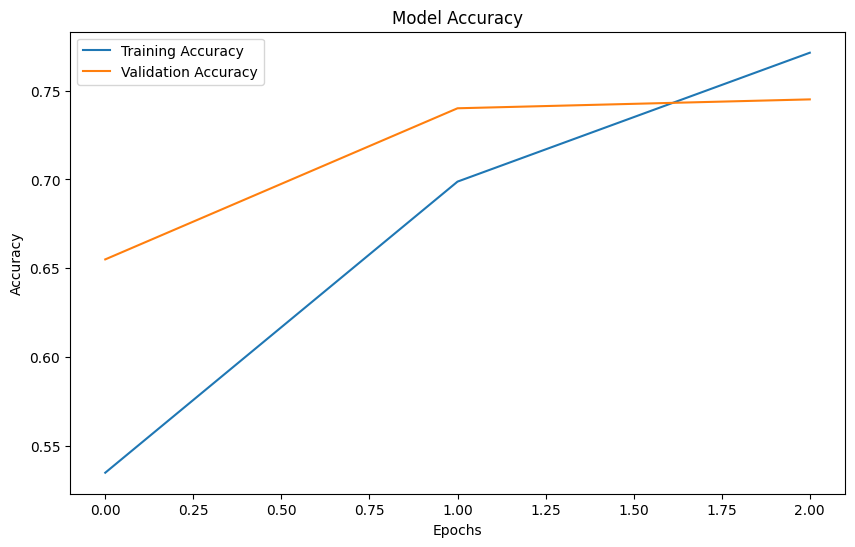

In [40]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

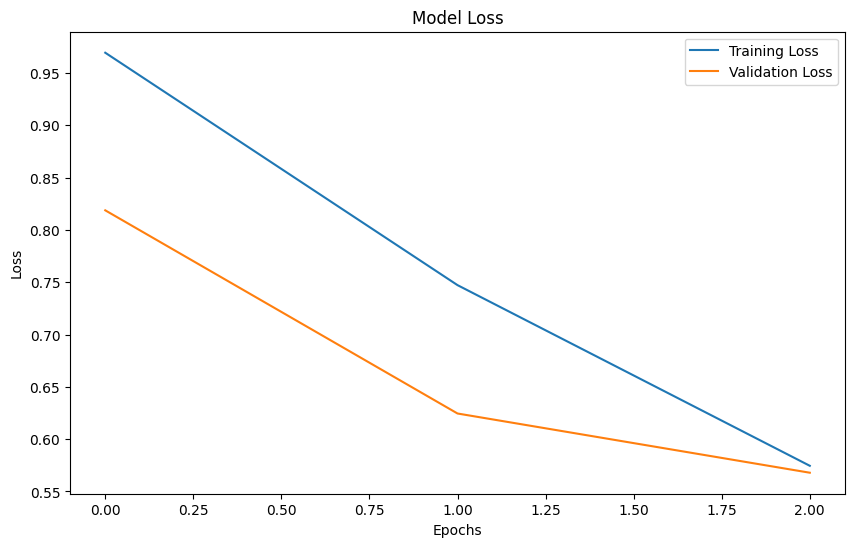

In [41]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
# Display final report and confusion matrix
print("Final Classification Report:\n", final_report)
print("Final Confusion Matrix:\n", final_cm)

Final Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.03      0.06        30
           1       0.71      0.91      0.80        81
           2       0.79      0.83      0.81        89

    accuracy                           0.74       200
   macro avg       0.67      0.59      0.56       200
weighted avg       0.71      0.74      0.69       200

Final Confusion Matrix:
 [[ 1 16 13]
 [ 0 74  7]
 [ 1 14 74]]


In [43]:
# Save the model
torch.save(model.state_dict(), 'Models/bert_sentiment_model_weights.pth')

# # load wights
# model = bert_classifier(bert_model, num_class).to(device)
# model.load_state_dict(torch.load('bert_sentiment_model_weights.pth'))

In [44]:
# Saving the Entire Model
torch.save(model, 'Models/bert_sentiment_model.pth')

# # Load the model
# model = torch.load('bert_sentiment_model.pth')